# Assignment: Linear Models
## Foundations of Machine Learning
## Jenny Schilling (xdj3kg)
## Completed Q1 and Q3


In [3]:
! git clone https://github.com/jennyschilling/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 45 (delta 7), reused 2 (delta 2), pack-reused 31
Receiving objects: 100% (45/45), 2.58 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import kdeplot
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


In [5]:
df = pd.read_csv('./linearRegression/data/Q1_clean.csv')
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

averages = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print(averages)

                    Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750


Manhattan is by far the most expensive on average, with Staten Island and Brooklyn in second and third.

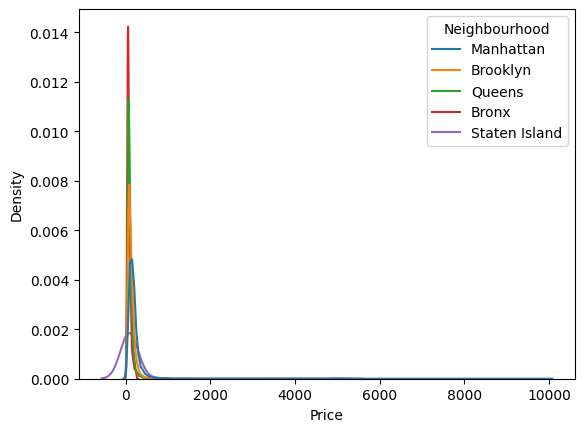

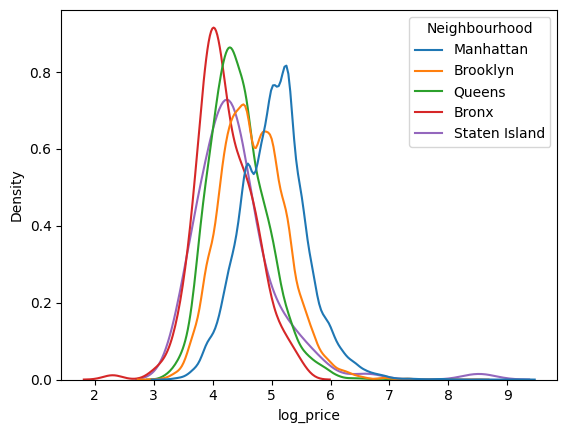

In [6]:
df['log_price'] = np.log(df['Price'])
kdeplot(data=df, x='Price', hue='Neighbourhood', common_norm=False)
plt.show()
kdeplot(data=df, x='log_price', hue='Neighbourhood', common_norm=False)
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?


In [7]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int')
model = linear_model.LinearRegression(fit_intercept=False).fit(X,y)
pd.DataFrame({'Neighbourhood':model.feature_names_in_, 'Coefficient': model.coef_})

,Neighbourhood,Coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficients for each variable appear to be the same as the averages we got in part 1. Therefore, it is likely that the coefficients in a regression of a continuous variable on one categorical variable are equivalent to the averages of those variables.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [8]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first=True)
model = linear_model.LinearRegression(fit_intercept=True).fit(X,y)
print(f"Intercept: {model.intercept_}\n")
print(f"\n{pd.DataFrame({'Neighbourhood':model.feature_names_in_, 'Coefficient': model.coef_})}")
print(f"\nAdding the coefficients and the intercept: \n{pd.DataFrame({'Neighbourhood':model.feature_names_in_, 'Coefficient': model.coef_ + model.intercept_})}")

Intercept: 75.27649769585331


   Neighbourhood  Coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169

Adding the coefficients and the intercept: 
   Neighbourhood  Coefficient
0       Brooklyn   127.747378
1      Manhattan   183.664286
2         Queens    96.857233
3  Staten Island   146.166667


Since we used one-hot encoding, one neighborhood had to be left out. This became the Bronx, forming the basis for comparison. We fit the model without an  intercept, but the Bronx acts as the intercept, representing the average price in that neighborhood. The coefficients for the other neighborhoods show how much higher or lower their average prices are compared to the Bronx. To get the equivalent coefficients from a model with an intercept, we can add each neighborhood's coefficient in this model to the Bronx's average price.

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [18]:
X = df.loc[:,['Review Scores Rating', 'Neighbourhood']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis = 1)

model = linear_model.LinearRegression(fit_intercept=False)
model.fit(Z_train, y_train)
y_pred = model.predict(Z_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2:", r2)
print("RMSE:", rmse)

coefficients = model.coef_
review_scores_coeff = coefficients[1]
print("Coefficient:", review_scores_coeff)

print(f"\n{pd.DataFrame({'Neighbourhood':model.feature_names_in_, 'Coefficient': model.coef_})}")

R^2: 0.06701086106947296
RMSE: 125.01092061382933
Coefficient: -17.261391740147644

          Neighbourhood  Coefficient
0  Review Scores Rating     1.032257
1                 Bronx   -17.261392
2              Brooklyn    32.180888
3             Manhattan    89.421020
4                Queens     4.050208
5         Staten Island    61.576393


With a random state of 100, the R^2 and RMSE on the test set are 0.067 and 125.01, respectively. The coefficient on Review Scores Rating is -17.26. The most expensive property you can rent must be one in Manhattan since it has the highest coefficient.  

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Room Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [24]:
# changed to Room Type from Property type because there are not enough feature names in the training dataset to encompass all the types in the test set and visaversa
X = df.loc[:,['Review Scores Rating', 'Neighbourhood', 'Room Type']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int'), pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood'], dtype='int'), pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

model = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)
y_pred = model.predict(Z_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2:", r2)
print("RMSE:", rmse)

coefficients = model.coef_
review_scores_coeff = coefficients[1]
print("Coefficient:", review_scores_coeff)

print(f"\n{pd.DataFrame({'Neighbourhood':model.feature_names_in_, 'Coefficient': model.coef_})}")

R^2: 0.22035348129282306
RMSE: 114.27692123130633
Coefficient: -13.022764635444986

          Neighbourhood  Coefficient
0  Review Scores Rating     0.626912
1                 Bronx   -13.022765
2              Brooklyn    10.378456
3             Manhattan    53.693304
4                Queens    -6.833330
5         Staten Island    50.003022
6       Entire home/apt   110.617820
7          Private room     3.101341
8           Shared room   -19.500474


With a random state of 100, the R^2 and RMSE on the test set are 0.220 and 114.277, respectively. The coefficient on Review Scores Rating is -13.023. The most expensive type of property you can rent is an entire home in manhattan.

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


In multiple linear regression, each coefficient represents the expected change in the target variable ('Price' in our case) associated with a change in that feature, while all other features are constant. We see the coefficient on Review Scores Rating change from about -17 to -13 from parts 4 to 5, with the only change in our model being the incorporation of Room Type in the regression model. This increase in coefficient is likely due to the fact that our model is now *more accurate* with more data to train off of. The coefficient of -17.26 likely overestimated the true effect of review scores on price. It was "assuming" some of the effects actually caused by the type of property, which we then provided actual data for in part 5.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.


2. Create a dummy variable indicating that the defendant is Black.


3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?


4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.


5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.


6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.